TensorFlow 2.x 기반의 MNIST 학습 및 검증 예제

1. 학습데이터와 테스트 데이터를 255.0 으로 나누어서 정규화 시킴

2. 정답데이터를 one-hot encoding 시킴

3. Flatten(input_shape=(28,28,1)) 이용하여 input_layer 생성함. 이게 가능하다면 cifar10 에서는 input_shape=(28,28,3) 등으로 나타내도 될것 같음 

4. 정답데이터를 one-hot encoding 하였기 때문에 model.compile() 에서 loss 는
loss='categorical_crossentropy' 지정함. 만약 정답 데이터를 one-hot encoding 시키지 않는다면 loss='sparse_categorical_crossentropy' 같이 지정해야 함

5. model.predict() 수행할때는, 텐서형태로 reshape 시켜서 해주어야함

6. 입력층을 표시할때, Dense(..,input_dim=784,...) 등으로 나타내면 error 발생. error 없이 실행하기 위해서는 Flatten(input_shape=(28,28)) 같이 tensor 표현해야 함. 즉 Flatten(input_shape=(784,)) 같이 vector 표시하면 warning 발생함

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

print(tf.__version__)

2.2.0


In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()   # 1

print('')
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)

11493376/11490434 [==============================] - 0s 0us/step

x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 정규화 및 one-hot encoding 확인
print('max = ', x_train[0].max(),', min = ', x_train[0].min(), '\n\nlabel = ', t_train[0])

max =  255 , min =  0 

label =  5


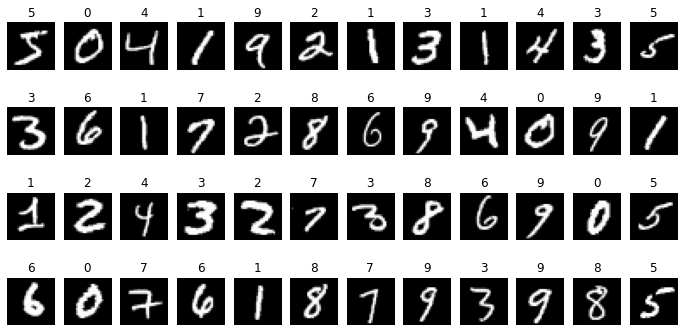

In [4]:
# 48개의 이미지 출력
plt.figure(figsize=(12, 6))  # (6,1), (12,1), (12,6), (6,6) 등으로 다양하게 해본다

for index in range(48):    # 48 개 이미지 출력

    plt.subplot(4, 12, index + 1)  # 4행 12열 
    plt.title(str(t_train[index]))  # 정답 출력
    plt.imshow(x_train[index], cmap='gray')    # 1행 1열 -> 1행 2열 -> ...-> 1행 12열 -> 2행 1열 -> ...
    plt.axis('off')  # plt.axis('off) 하면 x, y 축의 0~25 사라짐

plt.show()

In [5]:
# x_train, x_test 값 범위를 0 ~ 1 사이로 정규화

x_train = x_train / 255.0
x_test = x_test / 255.0

# 정규화 결과 확인
print('train max = ', x_train[0].max(),', train min = ', x_train[0].min())
print('test max = ', x_train[0].max(),', test min = ', x_train[0].min())

train max =  1.0 , train min =  0.0
test max =  1.0 , test min =  0.0


In [6]:
# 정답 데이터 one-hot encoding
t_train = to_categorical(t_train, 10)
t_test = to_categorical(t_test, 10)

# one-hot encoding 확인
print('train label = ', t_train[0], ', decimal value = ', np.argmax(t_train[0]))
print('test label = ', t_test[0], ', decimal value = ', np.argmax(t_test[0]))

train label =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] , decimal value =  5
test label =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] , decimal value =  7


In [0]:
model = Sequential()      # ANN model 생성

# 입력층 생성. 입력층 노드수는 28 x 28 = 784 개. name 파라미터는 생략가능

input_layer = Flatten(input_shape=(28, 28, 1), name='input_layer')

model.add(input_layer)

# 100 개의 노드를 가지는 은닉층. name 파라미터는 생략가능

hidden_layer = Dense(100, activation='relu', name='hidden_layer')

model.add(hidden_layer)

# 10개의 노드를 가지는 출력층. name 파라미터는 생략가능

output_layer = Dense(10, activation='softmax', name='output_layer')

model.add(output_layer)

In [8]:
# 케라스 모델을 기계가 이해할 수 있는 언어로 컴파일. 오차 함수, 최적화 알고리즘, 메트릭 함수등 선택

from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer (Dense)         (None, 100)               78500     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
# layers 속성으로 각 층의 특성을 미리 볼수 있음

layer1 = model.layers[0]
layer2 = model.layers[1]
layer3 = model.layers[2]

print(layer1.name, type(layer1), layer1.output_shape, layer1.count_params())
print(layer2.name, type(layer2), layer2.output_shape, layer2.count_params())
print(layer3.name, type(layer3), layer3.output_shape, layer3.count_params())

input_layer <class 'tensorflow.python.keras.layers.core.Flatten'> (None, 784) 0
hidden_layer <class 'tensorflow.python.keras.layers.core.Dense'> (None, 100) 78500
output_layer <class 'tensorflow.python.keras.layers.core.Dense'> (None, 10) 1010


In [10]:
from datetime import datetime

history_loss_list = []
history_accuracy_list = []

history_val_loss_list = []
history_val_accuracy_list = []

epochs_num = 5


start_time = datetime.now()

for step in range(10):

    hist = model.fit(x_train, t_train, epochs=epochs_num, batch_size=100, validation_split=0.2, verbose=0)

    # 리스트에서 [-1] 해주지 않으면 5개의 리스트 값 모두 출력 됨

    print('epochs = ', (step+1)*epochs_num, ', accuracy = ', hist.history['accuracy'][-1], ' , val_accuracy = ', hist.history['val_accuracy'][-1])

    history_loss_list.append(hist.history['loss'])
    history_accuracy_list.append(hist.history['accuracy'])

    history_val_loss_list.append(hist.history['val_loss'])
    history_val_accuracy_list.append(hist.history['val_accuracy'])

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

epochs =  5 , accuracy =  0.9555833339691162  , val_accuracy =  0.9580833315849304
epochs =  10 , accuracy =  0.9740833044052124  , val_accuracy =  0.9677500128746033
epochs =  15 , accuracy =  0.9815416932106018  , val_accuracy =  0.9700000286102295
epochs =  20 , accuracy =  0.9870416522026062  , val_accuracy =  0.9729999899864197
epochs =  25 , accuracy =  0.9903958439826965  , val_accuracy =  0.9724166393280029
epochs =  30 , accuracy =  0.9931666851043701  , val_accuracy =  0.9738333225250244
epochs =  35 , accuracy =  0.9955000281333923  , val_accuracy =  0.9734166860580444
epochs =  40 , accuracy =  0.996791660785675  , val_accuracy =  0.9745833277702332
epochs =  45 , accuracy =  0.9979583621025085  , val_accuracy =  0.9748333096504211
epochs =  50 , accuracy =  0.9986458420753479  , val_accuracy =  0.9749166369438171

Elapsed Time =>  0:00:48.832509


In [11]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9775


[0.07776133716106415, 0.9775000214576721]

In [12]:
# train data 손실함수 값과 정확고 값을 하나의 리스트로 나타냄

import numpy as np

train_loss_list =  np.array(history_loss_list).flatten().tolist()
train_accuracy_list = np.array(history_accuracy_list).flatten().tolist()

val_loss_list = np.array(history_val_loss_list).flatten().tolist()
val_accuracy_list = np.array(history_val_accuracy_list).flatten().tolist()

print(type(train_loss_list), type(train_accuracy_list), type(val_loss_list), type(val_accuracy_list))
print(len(train_loss_list), len(train_accuracy_list), len(val_loss_list), len(val_accuracy_list))

<class 'list'> <class 'list'> <class 'list'> <class 'list'>
50 50 50 50


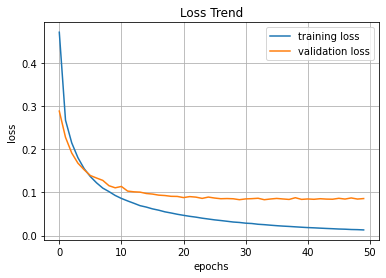

In [13]:
# 손실함수 그래프

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(train_loss_list, label='training loss')
plt.plot(val_loss_list, label='validation loss')
plt.legend(loc='best')

plt.show()

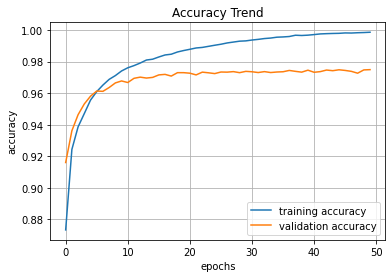

In [14]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(train_accuracy_list, label='training accuracy')
plt.plot(val_accuracy_list, label='validation accuracy')
plt.legend(loc='best')

plt.show()

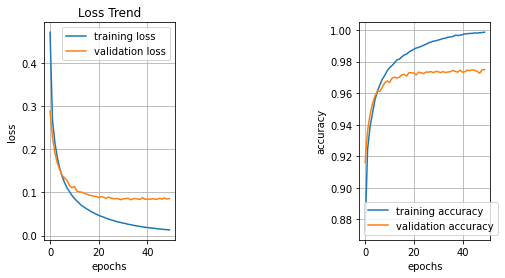

In [15]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)  # 1행 2열은 가독성을 위해서 띄움

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(train_loss_list, label='training loss')
plt.plot(val_loss_list, label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 3, 3)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(train_accuracy_list, label='training accuracy')
plt.plot(val_accuracy_list, label='validation accuracy')
plt.legend(loc='best')

plt.show()

In [16]:
# index_label_prediction_list 생성 및 false prediction 이미지 출력

ret_val = model.predict(x_test.reshape(-1,28,28,1))

print('type(ret_val) = ', type(ret_val), ', ret_val.shape = ', ret_val.shape)

# predict 실행 결과는 softmax 에 의한 확률 결과이므로, argmax 이용해서 10진수로 바꾸어 주어야함

predicted_val = np.argmax(ret_val, axis=1)  # 행 단위로 argmax 실행

# t_test 는 이미 one-hot encoding 되어 있으므로 십진수 형태로 label 생성해줌

label = np.argmax(t_test, axis=1)    

# label 과 predicted_val 비교하여 True / False 값 생성

label_prediction_comp_val = np.equal(label, predicted_val)

# list comprehension 이용하여 index_label_prediction 구현

index_label_prediction_list = [ [index, label[index], predicted_val[index] ]  for index, result in enumerate(label_prediction_comp_val)  if result == False ]

print(len(index_label_prediction_list))

print('Accuracy = ', 1 - ( len(index_label_prediction_list) / len(label) ))

type(ret_val) =  <class 'numpy.ndarray'> , ret_val.shape =  (10000, 10)
225
Accuracy =  0.9775


In [17]:
print(index_label_prediction_list)

[[61, 8, 2], [149, 2, 4], [247, 4, 2], [321, 2, 7], [340, 5, 3], [445, 6, 0], [449, 3, 5], [495, 8, 2], [582, 8, 2], [619, 1, 8], [659, 2, 1], [684, 7, 3], [691, 8, 4], [707, 4, 9], [720, 5, 8], [740, 4, 9], [760, 4, 9], [882, 9, 7], [938, 3, 5], [947, 8, 9], [956, 1, 2], [965, 6, 0], [1003, 5, 3], [1014, 6, 5], [1039, 7, 2], [1112, 4, 6], [1178, 4, 0], [1181, 6, 1], [1194, 7, 9], [1224, 2, 4], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1247, 9, 3], [1289, 5, 9], [1319, 8, 3], [1328, 7, 8], [1378, 5, 6], [1393, 5, 3], [1395, 2, 3], [1444, 6, 4], [1494, 7, 9], [1500, 7, 1], [1522, 7, 9], [1530, 8, 7], [1549, 4, 2], [1553, 9, 8], [1609, 2, 6], [1621, 0, 6], [1681, 3, 7], [1751, 4, 2], [1790, 2, 8], [1850, 8, 7], [1901, 9, 4], [1940, 5, 0], [1941, 7, 8], [1987, 0, 9], [2004, 8, 9], [2016, 7, 2], [2024, 7, 9], [2035, 5, 3], [2052, 8, 4], [2053, 4, 9], [2070, 7, 9], [2073, 5, 0], [2109, 3, 2], [2118, 6, 0], [2130, 4, 9], [2135, 6, 1], [2148, 4, 9], [2174, 3, 5], [2182, 1, 2], [2189, 9, 1], 

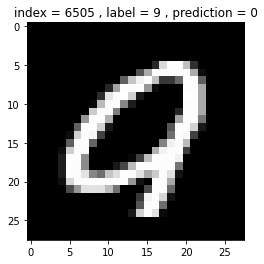

In [18]:
# 임의의 false prediction MNIST 이미지 출력

false_data_index = np.random.randint(len(index_label_prediction_list))

mnist_index = index_label_prediction_list[false_data_index][0]
label = index_label_prediction_list[false_data_index][1]
prediction = index_label_prediction_list[false_data_index][2]

#print('mnist_index => ', mnist_index, ', label = ', label, ', prediction = ', prediction)

img = x_test[mnist_index].reshape(28,28)    # 여기서 (28,28,1) 하면 error 발생

title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

plt.title(str(title_str))
plt.imshow(img, cmap='gray')
plt.show()

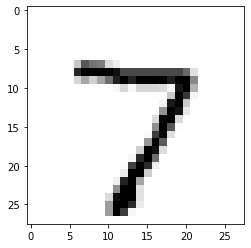

Answer =  7


In [19]:
plt.imshow(x_test[0].reshape(28, 28), cmap='Greys', interpolation='nearest')  # 여기서 reshape(28,28,1) 하면 error 발생
plt.show()

predicted_val = model.predict(x_test[0].reshape(1, 28, 28, 1))  # 채널 표시할때 reshape(1,28,28,1) 해줌

print('Answer = ', np.argmax(predicted_val))

In [20]:
# 5개 데이터 예측

for index in range(5):
    
    predicted_val = model.predict(x_test[index].reshape(1, 28, 28))  # 채널 표시할때 reshape(1,28,28,1) 해줌

    print('Answer = ', np.argmax(predicted_val))

Answer =  7
Answer =  2
Answer =  1
Answer =  0
Answer =  4


In [21]:
# 5개 데이터 예측

for index in range(5):
    
    predicted_val = model.predict(x_test[index].reshape(1, 28, 28, 1)) 

    print('Answer = ', np.argmax(predicted_val))

Answer =  7
Answer =  2
Answer =  1
Answer =  0
Answer =  4
